## Цель проекта

Отследить влияние условий жизни учащихся в возрасте от 15 до 22 лет на их успеваемость по математике, чтобы на ранней стадии выявлять студентов, находящихся в группе риска.

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from scipy.stats import ttest_ind

pd.set_option('display.max_rows', 50) # показывать больше строк
pd.set_option('display.max_columns', 50) # показывать больше колонок

stud = pd.read_csv('stud_math.xls')

In [9]:
display(stud.head(10))
stud.info()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
0,GP,F,18,U,NaN,A,4.0,4.0,at_home,teacher,course,mother,2.0,2.0,0.0,yes,no,no,no,yes,-6.0,yes,NaN,no,4.0,3.0,4.0,3.0,6.0,30.0
1,GP,F,17,U,GT3,NaN,1.0,1.0,at_home,other,course,father,1.0,2.0,0.0,no,yes,no,no,no,-6.0,yes,yes,no,5.0,3.0,3.0,3.0,4.0,30.0
2,GP,F,15,U,LE3,T,1.0,1.0,at_home,other,other,mother,1.0,2.0,3.0,yes,no,NaN,no,yes,-6.0,yes,yes,NaN,4.0,3.0,2.0,3.0,10.0,50.0
3,GP,F,15,U,GT3,T,4.0,2.0,health,NaN,home,mother,1.0,3.0,0.0,no,yes,yes,yes,yes,-9.0,yes,yes,yes,3.0,2.0,2.0,5.0,2.0,75.0
4,GP,F,16,U,GT3,T,3.0,3.0,other,other,home,father,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,no,no,4.0,3.0,2.0,5.0,4.0,50.0
5,GP,M,16,U,LE3,T,4.0,3.0,services,other,reputation,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,4.0,2.0,5.0,10.0,75.0
6,GP,M,16,NaN,LE3,T,2.0,2.0,other,other,home,mother,1.0,2.0,0.0,no,no,no,no,yes,-6.0,yes,yes,no,4.0,4.0,4.0,3.0,0.0,55.0
7,GP,F,17,U,GT3,A,4.0,4.0,other,teacher,home,mother,2.0,2.0,0.0,yes,yes,no,no,yes,-6.0,yes,no,no,4.0,1.0,4.0,1.0,6.0,30.0
8,GP,M,15,U,LE3,A,3.0,2.0,services,other,home,mother,1.0,2.0,0.0,no,yes,yes,no,yes,-6.0,yes,yes,no,NaN,2.0,2.0,1.0,0.0,95.0
9,GP,M,15,U,NaN,NaN,3.0,4.0,other,other,home,mother,1.0,2.0,0.0,no,yes,yes,yes,yes,-6.0,yes,yes,no,5.0,5.0,1.0,5.0,0.0,75.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

## Первичная обработка данных. 
Так как данных много, стоит написать функции, которые можно применять к столбцам определённого типа.

In [38]:
# функция category_data_processing предназначена для анализа столбцов,
# данные в которых принимают только определенные значения,
# например:пол ученика ('F' - женский, 'M' - мужской)
# для таких значений важно посмотреть распределение по категориям
# в качестве параметров задается название dataframe и колонки данных в dataframe

def category_data_processing(df, column):
    df[column].value_counts().plot(kind = 'bar', 
                              grid = True, 
                              colormap = 'coolwarm', 
                              title = str(column))
    plt.show()
    display(df[column].value_counts())
    empty = df[column].isnull().sum()
    print('Пустых значений в столбце: {:d}'.format(empty))

    
# Функция numeral_data_processing проводит первичный анализ численных данных,
# выдает описание значений, гистограмму распределения всех данных и гистограмму
# распределения межквартильного разброса

def numeral_data_processing(df, column):
    
    print('\n\n',column)
    df[column].hist()
    plt.show()
    display(df[column].describe())
    empty = df[column].isnull().sum()
    print('Пустых значений в столбце: {:d}'.format(empty))
    
    print('\n\n',column,'IQR')
    median = df[column].median()
    IQR = df[column].quantile(0.75) - df[column].quantile(0.25)
    perc25 = df[column].quantile(0.25)
    perc75 = df[column].quantile(0.75)
    print('25-й перцентиль: {},'.format(perc25), '75-й перцентиль: {},'.format(perc75)
          , "IQR: {}, ".format(IQR),"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))
    df[column].loc[df[column].between(perc25 - 1.5*IQR, perc75 + 1.5*IQR)].hist()
    plt.show()

    
# Функция get_boxplot строит график Box-Plot для визуализации номинативных переменных
    
def get_boxplot(df, column):
    fig, ax = plt.subplots(figsize = (14, 4))
    sns.boxplot(x=column, y='score', 
                data=df.loc[df.loc[:, column].isin(df.loc[:, column].value_counts().index[:])],
               ax=ax)
    plt.xticks(rotation=45)
    ax.set_title('Boxplot for ' + column)
    plt.show()

    
# Функция get_stat_dif определяет, есть ли статистическая разница в распределении оценок 
# по номинативным признакам с помощью теста Стьюдента
      
def get_stat_dif(df, column):
    cols = df[column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(df.loc[df.loc[:, column] == comb[0], 'score'], 
                        df.loc[df.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

### Разделим столбцы значений по категориям для проведения первичной обработки

Данное деление не является делением на числовые и номинативные признаки. Главным принципом для данного деления является простота обработки и поиска выбросов

In [11]:
# Общие сведения об ученике
general_data_columns = [ 'sex', 'age', 'address']

# Данные о семье
family_data_columns = ['famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'guardian']

# Данные о школе и учебе
school_data_columns = ['school', 'reason',  'traveltime', 'studytime', 'studytime, granular', 'failures']

# Данные где ответом является значение является "да" или "нет"
binary_data_columns = [ 'schoolsup', 'famsup', 'paid', 'activities',
                       'nursery', 'higher', 'internet', 'romantic']

# Данные где ответом является цифра от 1 до 4
category_data_columns = [ 'famrel', 'freetime', 'goout', 'health']

#Данные с числовыми показателями
numeral_data_columns = ['absences', 'score']

#### Просмотри общие сведения об учениках

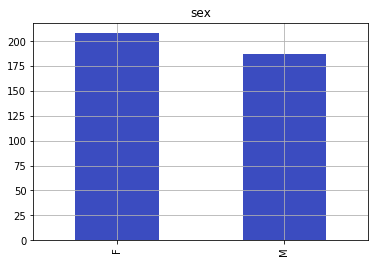

F    208
M    187
Name: sex, dtype: int64

Пустых значений в столбце: 0


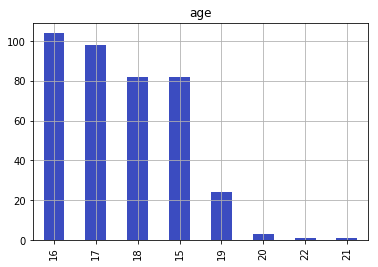

16    104
17     98
18     82
15     82
19     24
20      3
22      1
21      1
Name: age, dtype: int64

Пустых значений в столбце: 0


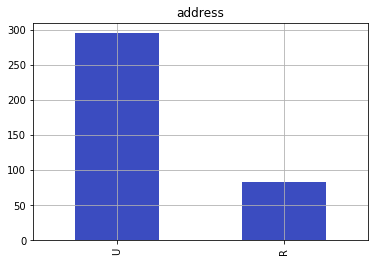

U    295
R     83
Name: address, dtype: int64

Пустых значений в столбце: 17


In [14]:
for column in general_data_columns:
    category_data_processing(stud, column)

в датасете примерно равное количество девочек и мальчиков. Большинство учеников до 19 лет и живут в городе

### Посмотрим данные о семье

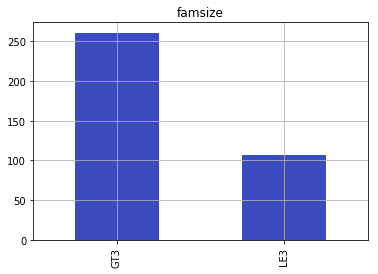

GT3    261
LE3    107
Name: famsize, dtype: int64

Пустых значений в столбце: 27


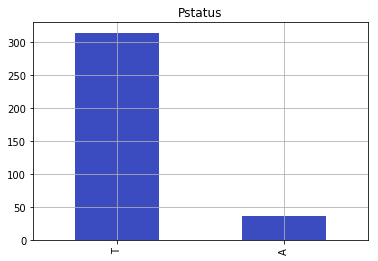

T    314
A     36
Name: Pstatus, dtype: int64

Пустых значений в столбце: 45


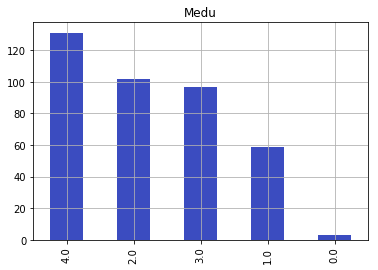

4.0    131
2.0    102
3.0     97
1.0     59
0.0      3
Name: Medu, dtype: int64

Пустых значений в столбце: 3


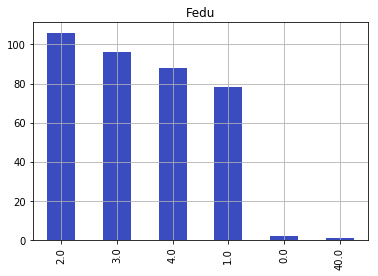

2.0     106
3.0      96
4.0      88
1.0      78
0.0       2
40.0      1
Name: Fedu, dtype: int64

Пустых значений в столбце: 24


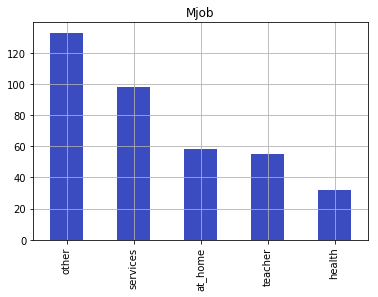

other       133
services     98
at_home      58
teacher      55
health       32
Name: Mjob, dtype: int64

Пустых значений в столбце: 19


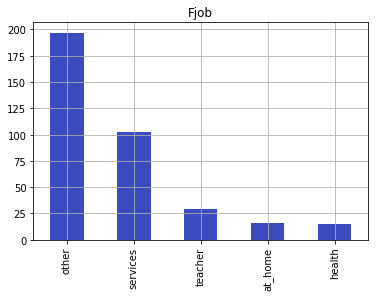

other       197
services    102
teacher      29
at_home      16
health       15
Name: Fjob, dtype: int64

Пустых значений в столбце: 36


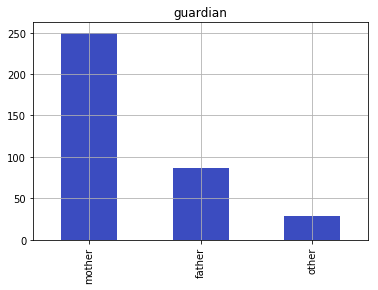

mother    250
father     86
other      28
Name: guardian, dtype: int64

Пустых значений в столбце: 31


In [15]:
for column in family_data_columns:
    category_data_processing(stud, column)

* Большинство семей включает больше трёх человек
* Большинство родителей находятся вместе. Судя по пустым строкам многие не любят разглашать данную информацию, возможно родителей в разводе гораздо больше
* Больше всего матерей с высшим образованием
* При этом у большинства отцов образование 5-9 классы. Есть аномалия - у одного отца значение 40.0
* В целом родители больше заняты в других сферах
* Большинство опекунов - матери. Пустых значений тоже достаточно, обычно такую информацию не хотят разглашать если опекуны не родители

Рассмотрим аномалию в образовании отцов

Логично предположить, что при записи данных имелось в виду значение 4.0

In [16]:
stud[stud.Fedu == 40]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,"studytime, granular",higher,internet,romantic,famrel,freetime,goout,health,absences,score
11,GP,F,15,U,GT3,NaN,2.0,40.0,services,other,reputation,father,3.0,3.0,0.0,no,yes,no,yes,yes,-9.0,yes,yes,no,5.0,2.0,2.0,4.0,4.0,60.0


In [17]:
stud.Fedu = stud.Fedu.replace(40.0, 4.0)

### Рассмотрим данные о школе и учебе

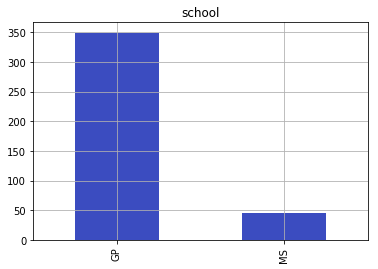

GP    349
MS     46
Name: school, dtype: int64

Пустых значений в столбце: 0


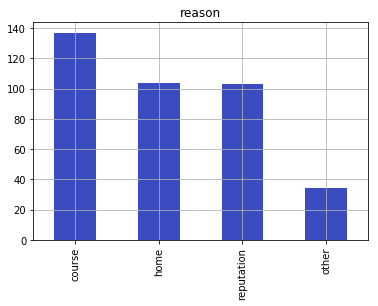

course        137
home          104
reputation    103
other          34
Name: reason, dtype: int64

Пустых значений в столбце: 17


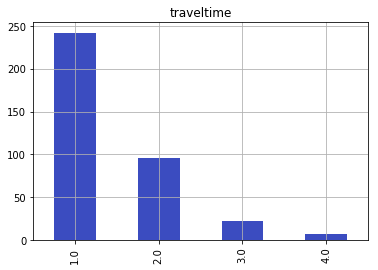

1.0    242
2.0     96
3.0     22
4.0      7
Name: traveltime, dtype: int64

Пустых значений в столбце: 28


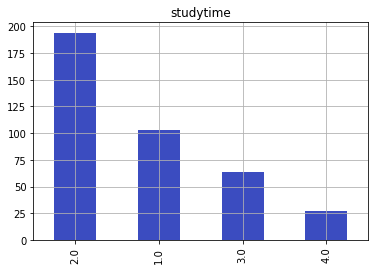

2.0    194
1.0    103
3.0     64
4.0     27
Name: studytime, dtype: int64

Пустых значений в столбце: 7


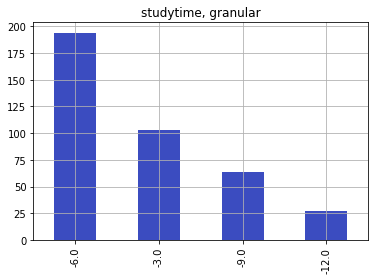

-6.0     194
-3.0     103
-9.0      64
-12.0     27
Name: studytime, granular, dtype: int64

Пустых значений в столбце: 7


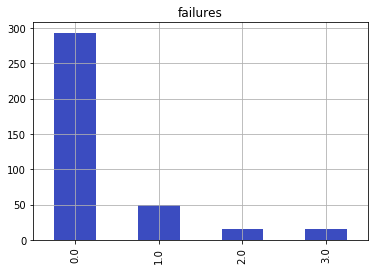

0.0    293
1.0     49
2.0     16
3.0     15
Name: failures, dtype: int64

Пустых значений в столбце: 22


In [18]:
for column in school_data_columns:
    category_data_processing(stud, column)

* Наиболее популярна школа GP
* Большинство при выборе школы делает упор на программе, на втором месте близость к дому, на третьем репутация
* При это большинство учеников живет рядом со школой
* Большинство помимо школы тратит на обучение 2-5 часов, меньшенство >10 часов
* В датафрейме имеется непонятный столбец studytime, granular подозрительно похожий на столбец studytime умноженный на (-3)
* Большинство не имеет неудач, при этом пропуски в данных могут означать, что людей с неудачами больше

Сравним столбцы studytime и studytime, granular

In [19]:
(stud['studytime']*(-3)).compare(stud['studytime, granular'])

,self,other


Столбцы инедтичны, следовательно можно удалить столбец studytime, granular

In [20]:
stud = stud.drop(['studytime, granular'], axis=1)

### Рассмотрим данные, где ответом является значение является "да" или "нет"

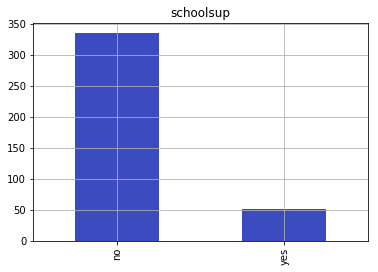

no     335
yes     51
Name: schoolsup, dtype: int64

Пустых значений в столбце: 9


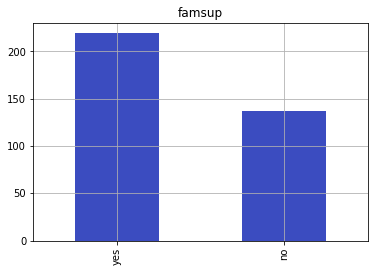

yes    219
no     137
Name: famsup, dtype: int64

Пустых значений в столбце: 39


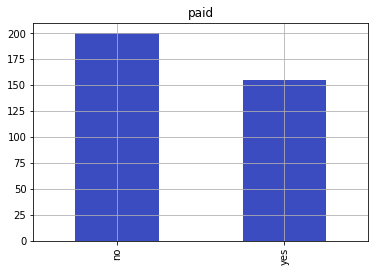

no     200
yes    155
Name: paid, dtype: int64

Пустых значений в столбце: 40


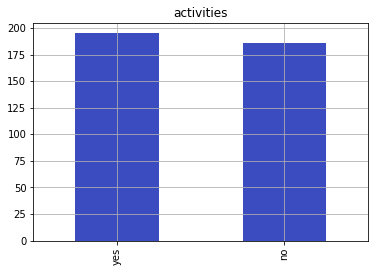

yes    195
no     186
Name: activities, dtype: int64

Пустых значений в столбце: 14


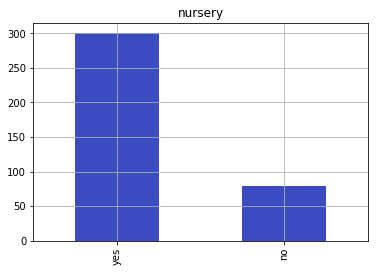

yes    300
no      79
Name: nursery, dtype: int64

Пустых значений в столбце: 16


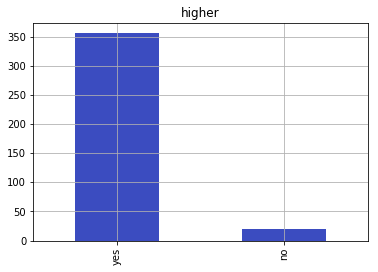

yes    356
no      19
Name: higher, dtype: int64

Пустых значений в столбце: 20


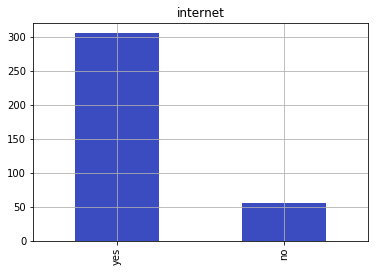

yes    305
no      56
Name: internet, dtype: int64

Пустых значений в столбце: 34


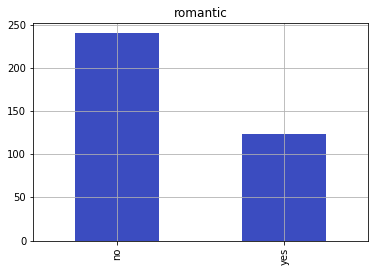

no     240
yes    124
Name: romantic, dtype: int64

Пустых значений в столбце: 31


In [21]:
for column in binary_data_columns:
    category_data_processing(stud, column)

Данный блок данных выглядит хорошо, но можно отметить большое количество пропусков

### Рассмотрим данные где ответом является цифра от 1 до 4

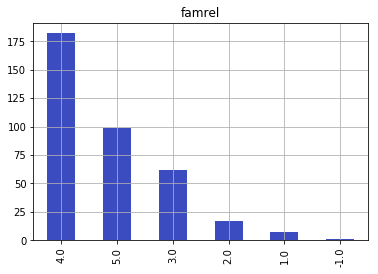

 4.0    182
 5.0     99
 3.0     62
 2.0     17
 1.0      7
-1.0      1
Name: famrel, dtype: int64

Пустых значений в столбце: 27


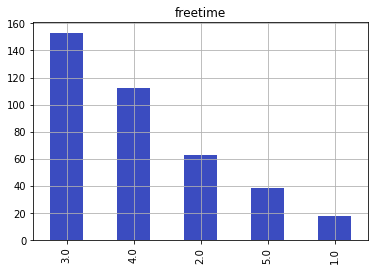

3.0    153
4.0    112
2.0     63
5.0     38
1.0     18
Name: freetime, dtype: int64

Пустых значений в столбце: 11


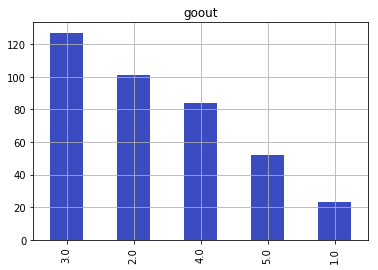

3.0    127
2.0    101
4.0     84
5.0     52
1.0     23
Name: goout, dtype: int64

Пустых значений в столбце: 8


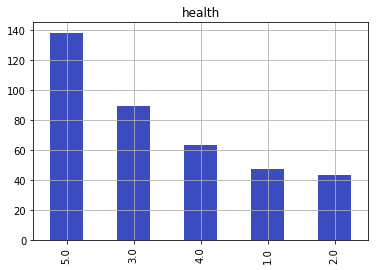

5.0    138
3.0     89
4.0     63
1.0     47
2.0     43
Name: health, dtype: int64

Пустых значений в столбце: 15


In [22]:
for column in category_data_columns:
    category_data_processing(stud, column)

В столбце famrel есть значение -1 не укладывающееся в рамки нашего диапозона, возможно это ошибка при записи (лишний минус), а возможно кто-то имел в виду, что отношения в семье хуже, чем очень плохие

In [23]:
stud[stud.famrel == -1]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
25,GP,F,16,U,GT3,NaN,2.0,2.0,services,services,home,mother,1.0,1.0,2.0,no,yes,yes,no,no,yes,yes,no,-1.0,2.0,2.0,5.0,14.0,40.0


На основе данных в строке можно предположить, что отношения в семье действительно могут быть очень плохие (нет данных о статусе родителей, опекун мать, образование родителей 5-9 классы).

In [24]:
stud.famrel = stud.famrel.replace(-1.0,1.0)
stud.famrel.value_counts()

4.0    182
5.0     99
3.0     62
2.0     17
1.0      8
Name: famrel, dtype: int64

### Рассмотрим столбцы с числовыми значениями



 absences


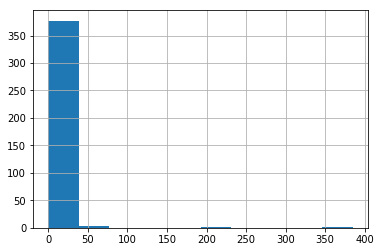

count    383.000000
mean       7.279373
std       23.465197
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

Пустых значений в столбце: 12


 absences IQR
25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


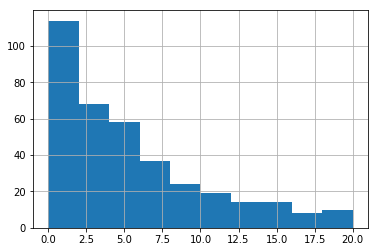



 score


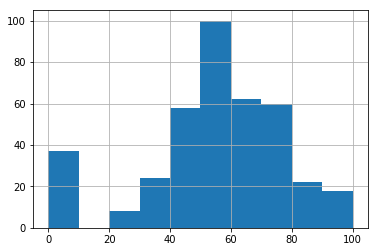

count    389.000000
mean      52.262211
std       22.919022
min        0.000000
25%       40.000000
50%       55.000000
75%       70.000000
max      100.000000
Name: score, dtype: float64

Пустых значений в столбце: 6


 score IQR
25-й перцентиль: 40.0, 75-й перцентиль: 70.0, IQR: 30.0,  Границы выбросов: [-5.0, 115.0].


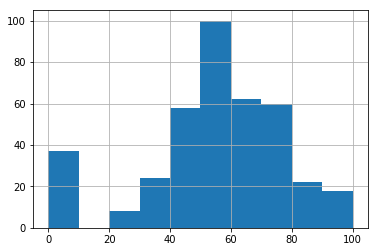

In [25]:
for column in numeral_data_columns:
    numeral_data_processing(stud, column)

На основе гистограмм распределения можно сделать следующие выводы:
* В данных о пропуске занятий присутствуют выбросы - есть значения в которых пропусков больше, чем дней в году. Однако нельзя отсекать все значения не входящие в межквартильный разброс, поскольку ученик мог пропустить и больше занятий, чем границы межквартильного разброса
* В данных об оценке за итоговый тест кажется странным разрыв между нулевой отметкой и 20 баллами. 
* Строки с пустыми значениями итоговых результатов (NaN в score) не дадут нам информации для построения прогноза, поэтому их можно смело удалить

Необходимо более подробно оценить данные

### Детальный анализ столбца absences

В зависимости от учебной системы (симестры, триместры, четверти) и праздников количество учебных дней в году может отличаться.
В по классической схеме в году 35 учебных недель - 175 учебных дней.
Остановимся на данном значении и удалим данные выходящие за предел этого значения.

In [26]:
stud = stud.loc[stud.absences<175]



 absences


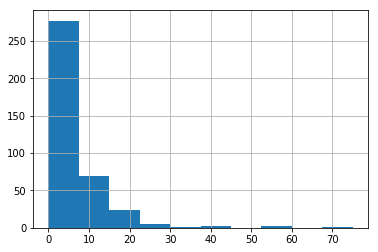

count    381.000000
mean       5.750656
std        8.088542
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max       75.000000
Name: absences, dtype: float64

Пустых значений в столбце: 0


 absences IQR
25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


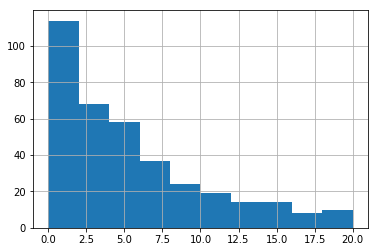

In [27]:
numeral_data_processing(stud, 'absences')

Интересно, как сдал экзамен ученик с 75 пропусками

In [28]:
stud[stud.absences == 75]

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
276,GP,F,18,R,GT3,A,3.0,2.0,other,services,home,mother,2.0,2.0,0.0,no,NaN,no,no,no,no,yes,yes,NaN,1.0,1.0,5.0,75.0,45.0


### Детальный анализ столбца score

Оставим в датафрейме только заполненные данные о результате теста

In [29]:
stud = stud[stud.score.notnull()]

рассмотрим нулевые результаты за тест

In [30]:
stud[stud.score == 0].head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
128,GP,M,18,R,NaN,T,2.0,2.0,NaN,other,reputation,mother,1.0,1.0,2.0,no,yes,no,yes,yes,yes,yes,no,3.0,3.0,3.0,4.0,0.0,0.0
130,GP,F,15,R,GT3,T,3.0,4.0,services,teacher,course,father,2.0,3.0,2.0,no,yes,no,no,yes,yes,yes,yes,4.0,2.0,2.0,5.0,0.0,0.0
131,GP,F,15,U,GT3,NaN,1.0,1.0,at_home,other,course,mother,3.0,1.0,0.0,no,yes,no,yes,no,yes,yes,yes,4.0,NaN,3.0,4.0,0.0,0.0
134,GP,M,15,R,GT3,T,3.0,4.0,at_home,teacher,course,mother,NaN,2.0,0.0,no,yes,no,no,yes,yes,no,yes,5.0,3.0,3.0,5.0,0.0,0.0
135,GP,F,15,U,GT3,T,4.0,4.0,services,NaN,course,mother,1.0,3.0,0.0,no,yes,no,yes,yes,yes,yes,yes,4.0,3.0,3.0,5.0,0.0,0.0


Странным является то, что нулевыми являются и результаты экзамена и количество пропусков (численные данные), возможно имел место какой-то сбой при записи или чтении данных.

Рассмотрим минимальные результаты за исключением нулевых

In [31]:
not_zero_score = stud[stud.score != 0]
not_zero_score.sort_values(by = 'score').head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,reason,guardian,traveltime,studytime,failures,schoolsup,famsup,paid,activities,nursery,higher,internet,romantic,famrel,freetime,goout,health,absences,score
216,GP,F,17,U,GT3,T,4.0,3.0,other,NaN,reputation,mother,1.0,2.0,2.0,no,no,yes,no,yes,yes,yes,yes,3.0,4.0,5.0,1.0,22.0,20.0
18,GP,M,17,U,GT3,T,3.0,2.0,services,services,course,mother,1.0,1.0,3.0,no,yes,NaN,yes,yes,yes,yes,no,5.0,5.0,5.0,5.0,16.0,25.0
72,GP,F,15,R,GT3,T,1.0,1.0,other,other,reputation,mother,1.0,2.0,2.0,yes,yes,no,no,no,yes,yes,yes,NaN,3.0,4.0,5.0,2.0,25.0
79,GP,F,16,U,NaN,T,3.0,4.0,at_home,other,course,mother,1.0,2.0,0.0,NaN,yes,no,no,yes,yes,yes,no,2.0,4.0,3.0,3.0,12.0,25.0
384,MS,M,18,R,GT3,T,4.0,2.0,other,NaN,home,father,NaN,1.0,1.0,no,no,NaN,no,yes,yes,NaN,no,5.0,4.0,3.0,3.0,14.0,25.0


У подавляющего большинства есть пропуски занятий, получается, что нулевой результат за тест это выброс вызванные потерей числовых данных

In [32]:
stud = not_zero_score

## Корреляционный анализ

In [33]:
correlation = stud.corr()
correlation

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,health,absences,score
age,1.000000,-0.123908,-0.128578,0.095591,-0.000084,0.216688,0.054775,-0.008774,0.111546,-0.056549,0.211007,-0.126372
Medu,-0.123908,1.000000,0.615016,-0.178387,0.061753,-0.202471,-0.007856,0.007917,0.066202,-0.050909,0.073974,0.183137
Fedu,-0.128578,0.615016,1.000000,-0.143047,-0.024448,-0.269007,-0.011726,-0.033338,0.032340,0.015709,0.029999,0.127103
traveltime,0.095591,-0.178387,-0.143047,1.000000,-0.103675,0.097119,-0.033883,-0.015093,0.021807,0.012656,-0.007783,-0.078898
studytime,-0.000084,0.061753,-0.024448,-0.103675,1.000000,-0.154357,0.058024,-0.131224,-0.030404,-0.090933,-0.078282,0.141472
failures,0.216688,-0.202471,-0.269007,0.097119,-0.154357,1.000000,-0.006982,0.120116,0.126289,0.061929,0.136301,-0.281811
famrel,0.054775,-0.007856,-0.011726,-0.033883,0.058024,-0.006982,1.000000,0.158252,0.036312,0.103881,-0.063147,0.066692
freetime,-0.008774,0.007917,-0.033338,-0.015093,-0.131224,0.120116,0.158252,1.000000,0.296922,0.056405,-0.081612,-0.015297
goout,0.111546,0.066202,0.032340,0.021807,-0.030404,0.126289,0.036312,0.296922,1.000000,0.002182,0.044601,-0.202971
health,-0.056549,-0.050909,0.015709,0.012656,-0.090933,0.061929,0.103881,0.056405,0.002182,1.000000,-0.016609,-0.055625


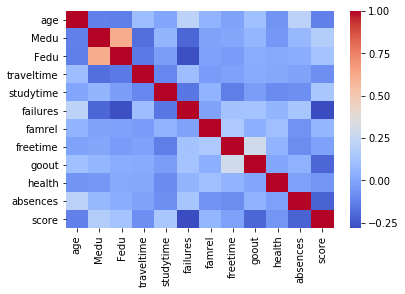

In [34]:
sns.heatmap(correlation, cmap = 'coolwarm')

Видно, что образование родителей хорошо коррелируется между собой, при этом образование матери в среднем влияет сильнее на результат теста, что можно объяснить следующим:

* Подавляющее большинство опекунов - матери
* Матерей с высшим образованием гораздо больше, чем отцов

В целом меньше всего на результат влияют такие параметры, как:

1. freetime
2. health
3. traveltime.

Так как образование родителей хорошо корелируется между собой, то можно оставить только один из этих показателей, который оказывает большее влияние на итоговый результат - образование матери

Исключим их из итогового датафрейма

In [35]:
stud = stud.drop(columns = ['freetime', 'health', 'traveltime', 'Fedu'])

Больше всего на результат теста влияют такие показатели, как
1. Количество внеучебных неудач - failures: чем меньше неудач, тем лучше будет оценка
2. Число пропусков - absences: чем меньше пропусков, тем лучше будет оценка
3. Проведение времени с друзьями - goout: чем меньше времени, проводится с друзьями, тем лучше будет оценка
4. Образование матери - Medu, чем выше уровень образование матери, тем лучше будет оценка
5. Время потраченное на учебу - studytime, чем больше, тем лучше будет оценка

### Анализ номинативных переменных

In [39]:
nominative_data = ['school','sex','address','famsize','Pstatus','Mjob',
                   'Fjob','reason','guardian','schoolsup','famsup','paid',
                   'activities','nursery','higher','internet','romantic']

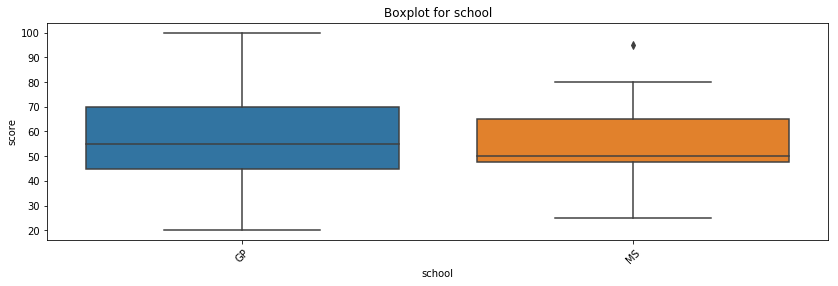

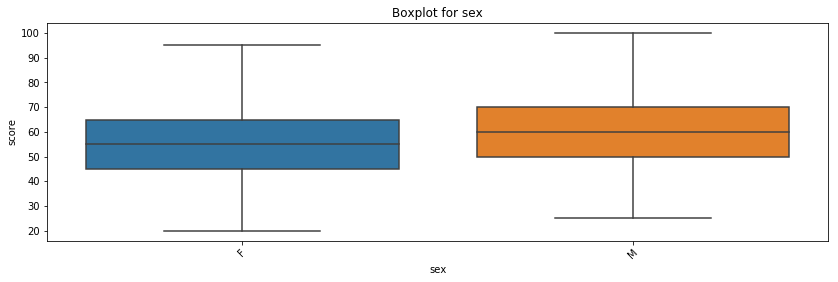

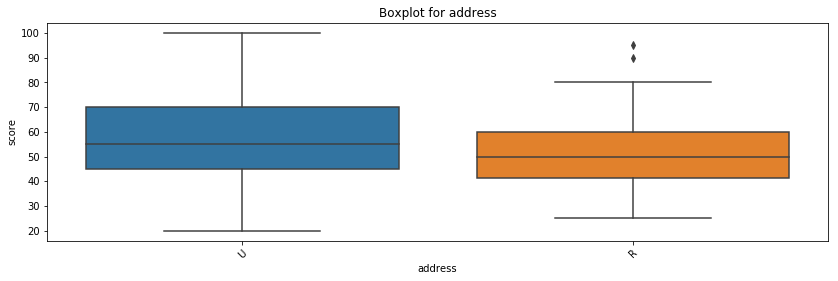

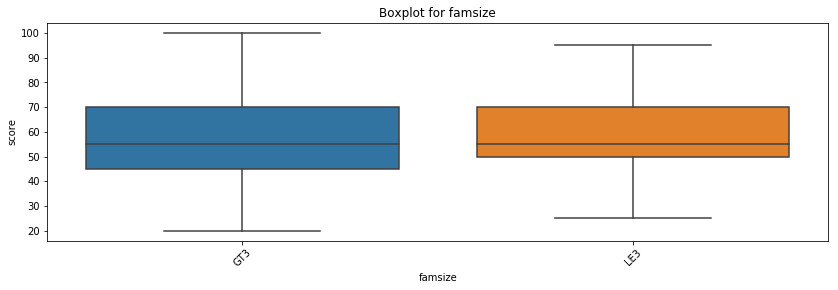

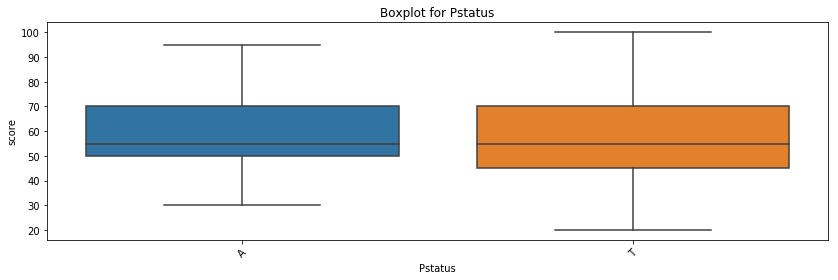

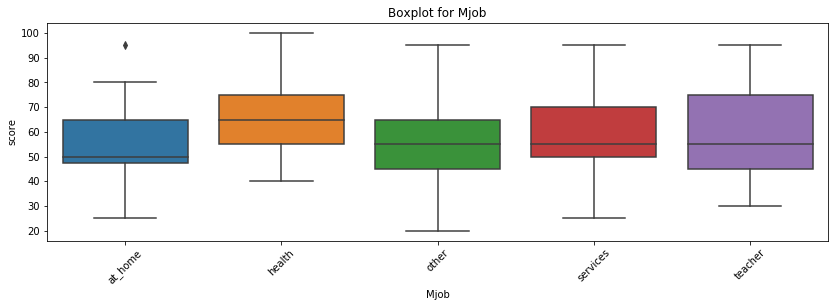

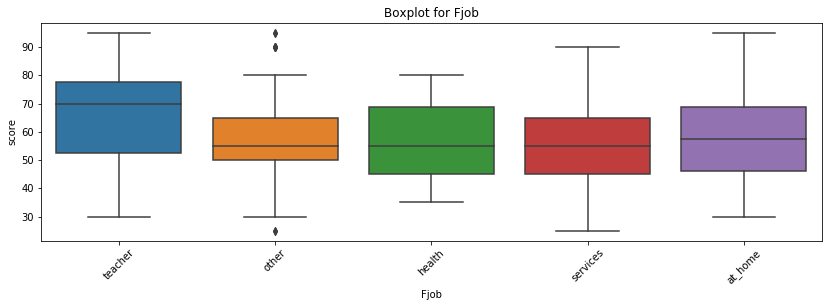

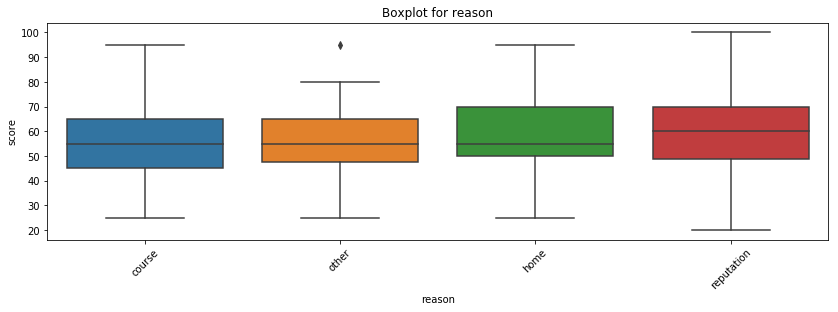

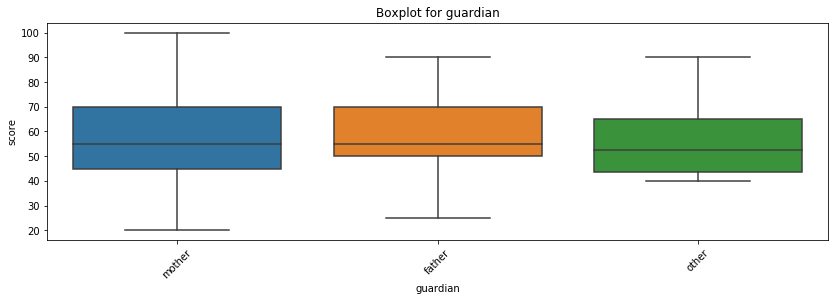

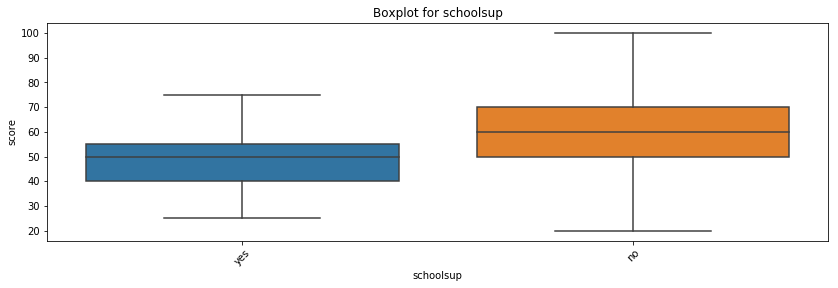

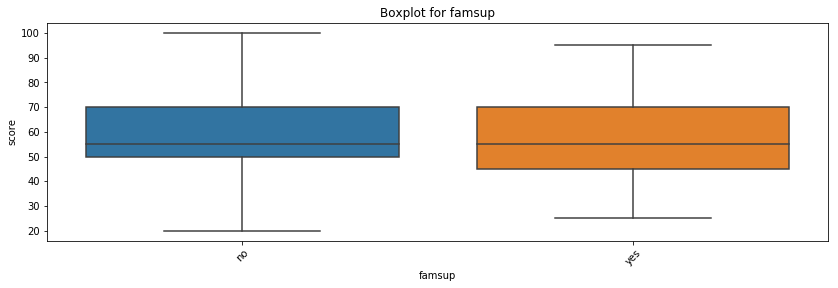

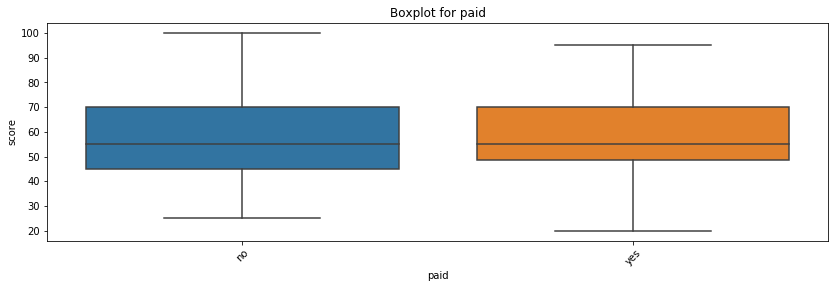

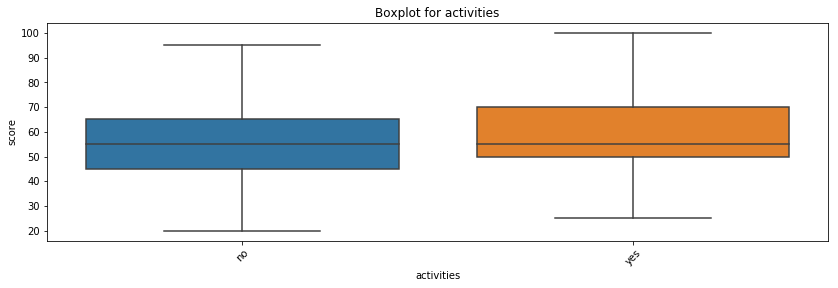

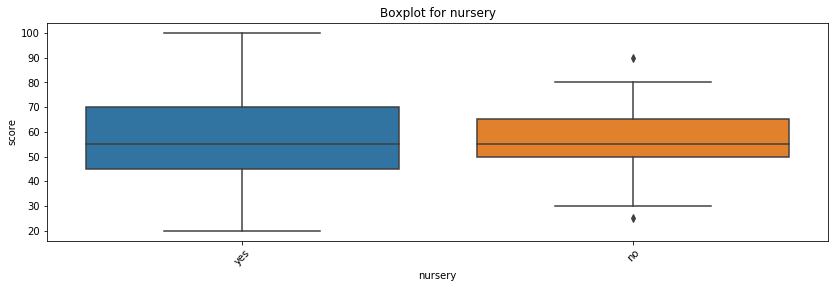

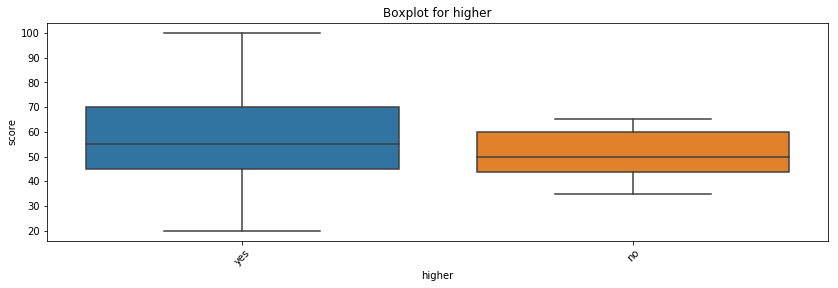

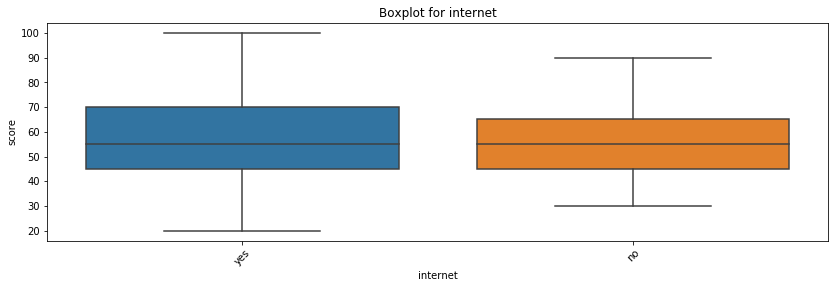

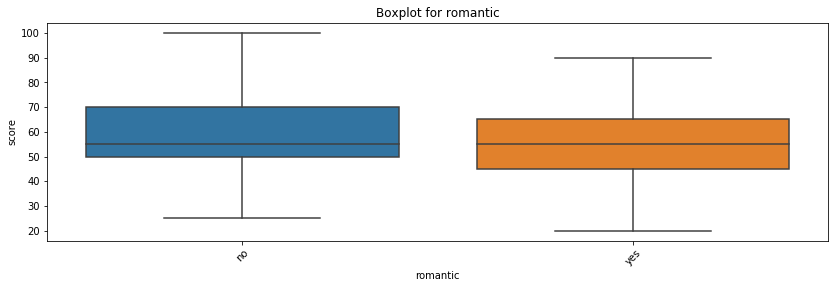

In [40]:
for column in nominative_data:
    get_boxplot(stud, column)

На основе графиков можно сделать вывод, что на результат не сильно влияют параметры
* Пол ученика
* Размер семьи
* Опекун

Высокое медианное значение баллов можно заметить у учеников, у которых
* отцы преподаватели
* матери работают в здравоохранении

Медианный былл выше у учеников, которые не пользуются дополнительной образовательной поддержкой - это означает, что ей пользуются в основном отстающие ученики

Те ученики, кто собирается идти за высшем образованием получает более высокие баллы


### Проверим выводы с помощью статистики

In [29]:
for column in nominative_data:
    get_stat_dif(stud, column)

Найдены статистически значимые различия для колонки address
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки schoolsup


Выходит основные номинативные признаки статистически влияющие на итоговый балл это address, Mjob, schoolsup.

## Итоговый датафрейм для анализа данных

In [30]:
stud_for_model = stud.loc[:, ['failures','absences','goout','Medu','studytime','address', 'Mjob', 'schoolsup','score']]
stud_for_model.head()

,failures,absences,goout,Medu,studytime,address,Mjob,schoolsup,score
0,0.0,6.0,4.0,4.0,2.0,U,at_home,yes,30.0
1,0.0,4.0,3.0,1.0,2.0,U,at_home,no,30.0
2,3.0,10.0,2.0,1.0,2.0,U,at_home,yes,50.0
3,0.0,2.0,2.0,4.0,3.0,U,health,no,75.0
4,0.0,4.0,2.0,3.0,2.0,U,other,no,50.0


In [31]:
stud_for_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 340 entries, 0 to 394
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   failures   320 non-null    float64
 1   absences   340 non-null    float64
 2   goout      334 non-null    float64
 3   Medu       338 non-null    float64
 4   studytime  335 non-null    float64
 5   address    327 non-null    object 
 6   Mjob       324 non-null    object 
 7   schoolsup  331 non-null    object 
 8   score      340 non-null    float64
dtypes: float64(6), object(3)
memory usage: 26.6+ KB


## Выводы

В результате EDA были получены следующие выводы:
* В датасете встречаются пропуски. Больше всего их в столбцах, касающихся семьи, неудач
* Выбросы найдены в столбцах Fedu, famrel, absences и score. Также есть лишний столбец studytime, granular повторяющий значению столбца studytime.
* Кореляция уровня образования родителей говорит о том, что родители в среднем имеют схожий уровень образования. При этом образование матерей больше влияет на успехи детей 
* Самые важные параметры используемые для построения EDU - 'failures','absences','goout','Medu','studytime','address', 'Mjob', 'schoolsup','score'